In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

C:\Users\sumat\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\sumat\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

In [5]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)

data = pd.read_csv("text-data.csv")

data.head()

,Record ID,Description,Text2
0,1,Impact,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...
1,2,Impact,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...
2,3,Impact,Anake Kū is my Kumu. I have looked up to her and have followed along in her mission and in her v...
3,4,Impact,I enjoyed the keynote because it was informational and felt really welcoming.
4,5,Impact,That Ku is a force in and of herself and changes and adapts with the times and circumstances. I...


In [6]:
data_cleaned = pd.read_csv("text-data.csv")
data_cleaned.head()

,Record ID,Description,Text2
0,1,Impact,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...
1,2,Impact,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...
2,3,Impact,Anake Kū is my Kumu. I have looked up to her and have followed along in her mission and in her v...
3,4,Impact,I enjoyed the keynote because it was informational and felt really welcoming.
4,5,Impact,That Ku is a force in and of herself and changes and adapts with the times and circumstances. I...


In [7]:
import string

In [8]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

data['body_text_clean'] = data['Text2'].apply(lambda x: remove_punct(x))

data.head()

,Record ID,Description,Text2,body_text_clean
0,1,Impact,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...
1,2,Impact,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...
2,3,Impact,Anake Kū is my Kumu. I have looked up to her and have followed along in her mission and in her v...,Anake Kū is my Kumu I have looked up to her and have followed along in her mission and in her vi...
3,4,Impact,I enjoyed the keynote because it was informational and felt really welcoming.,I enjoyed the keynote because it was informational and felt really welcoming
4,5,Impact,That Ku is a force in and of herself and changes and adapts with the times and circumstances. I...,That Ku is a force in and of herself and changes and adapts with the times and circumstances I ...


In [9]:
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

data['body_text_tokenized'] = data['body_text_clean'].apply(lambda x: tokenize(x.lower()))

data.head()

,Record ID,Description,Text2,body_text_clean,body_text_tokenized
0,1,Impact,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...,"[to, meet, someone, with, the, knowledge, and, passion, for, hawaii, is, inspirational, and, gav..."
1,2,Impact,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...,"[to, meet, someone, with, the, knowledge, and, passion, for, hawaii, is, inspirational, and, gav..."
2,3,Impact,Anake Kū is my Kumu. I have looked up to her and have followed along in her mission and in her v...,Anake Kū is my Kumu I have looked up to her and have followed along in her mission and in her vi...,"[anake, kū, is, my, kumu, i, have, looked, up, to, her, and, have, followed, along, in, her, mis..."
3,4,Impact,I enjoyed the keynote because it was informational and felt really welcoming.,I enjoyed the keynote because it was informational and felt really welcoming,"[, i, enjoyed, the, keynote, because, it, was, informational, and, felt, really, welcoming, ]"
4,5,Impact,That Ku is a force in and of herself and changes and adapts with the times and circumstances. I...,That Ku is a force in and of herself and changes and adapts with the times and circumstances I ...,"[, that, ku, is, a, force, in, and, of, herself, and, changes, and, adapts, with, the, times, an..."


In [10]:
#stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_text = data['body_text_tokenized'].apply(lambda x: [stemmer.stem(i) for i in x]) 
tokenized_text.head()

0    [to, meet, someon, with, the, knowledg, and, passion, for, hawaii, is, inspir, and, gave, me, a,...
1    [to, meet, someon, with, the, knowledg, and, passion, for, hawaii, is, inspir, and, gave, me, a,...
2    [anak, kū, is, my, kumu, i, have, look, up, to, her, and, have, follow, along, in, her, mission,...
3                         [, i, enjoy, the, keynot, becaus, it, wa, inform, and, felt, realli, welcom, ]
4    [, that, ku, is, a, forc, in, and, of, herself, and, chang, and, adapt, with, the, time, and, ci...
Name: body_text_tokenized, dtype: object

In [11]:
for i in range(len(tokenized_text)):
    tokenized_text[i] = ' '.join(tokenized_text[i])

data['body_text_tokenized'] = tokenized_text

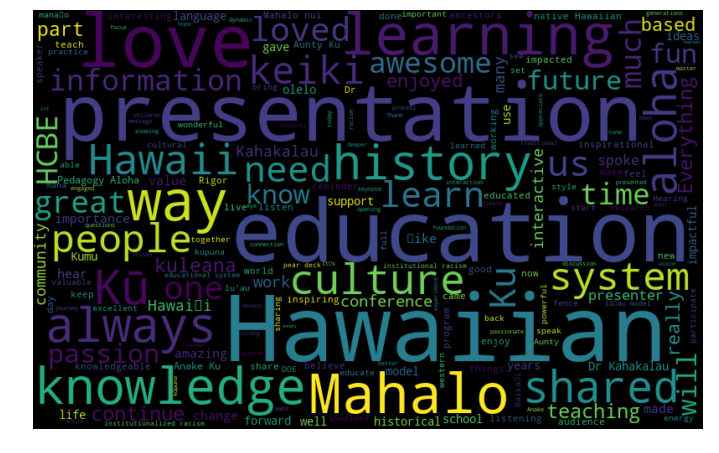

In [12]:
#most common words used
all_words = ' '.join([text for text in data['Text2'] ])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig("Wordcloud.png")
plt.show()


In [13]:
from textblob import TextBlob
TextBlob("I hate nlp").sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

In [14]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['body_text_clean'].apply(pol)
data['subjectivity'] = data['body_text_clean'].apply(sub)
data

,Record ID,Description,Text2,body_text_clean,body_text_tokenized,polarity,subjectivity
0,1,Impact,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...,to meet someon with the knowledg and passion for hawaii is inspir and gave me a deeper love for ...,0.333333,0.533333
1,2,Impact,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...,to meet someon with the knowledg and passion for hawaii is inspir and gave me a deeper love for ...,0.333333,0.533333
2,3,Impact,Anake Kū is my Kumu. I have looked up to her and have followed along in her mission and in her v...,Anake Kū is my Kumu I have looked up to her and have followed along in her mission and in her vi...,anak kū is my kumu i have look up to her and have follow along in her mission and in her vision ...,0.175000,0.375000
3,4,Impact,I enjoyed the keynote because it was informational and felt really welcoming.,I enjoyed the keynote because it was informational and felt really welcoming,i enjoy the keynot becaus it wa inform and felt realli welcom,0.350000,0.450000
4,5,Impact,That Ku is a force in and of herself and changes and adapts with the times and circumstances. I...,That Ku is a force in and of herself and changes and adapts with the times and circumstances I ...,that ku is a forc in and of herself and chang and adapt with the time and circumst i know she h...,0.616667,0.741667
...,...,...,...,...,...,...,...
224,237,Impact,Mahalo Anake Kū! She is always amazing so lucky to be able to learn from her.,Mahalo Anake Kū She is always amazing so lucky to be able to learn from her,mahalo anak kū she is alway amaz so lucki to be abl to learn from her,0.477778,0.786111
225,238,Impact,mahalo nui,mahalo nui,mahalo nui,0.000000,0.000000
226,239,Impact,i wish there was more time for each presentation~ i am looking forward to the recordings!,i wish there was more time for each presentation i am looking forward to the recordings,i wish there wa more time for each present i am look forward to the record,0.500000,0.500000
227,240,Impact,I enjoy learning from Aunty KŪ,I enjoy learning from Aunty KŪ,i enjoy learn from aunti kū,0.400000,0.500000


In [16]:
def getAnalysis(score):
        if score < 0:
            return 'Negative'
        elif score == 0:
            return 'Neutral'
        else:
            return 'Positive'       

In [17]:
data ['TextBlob_Analysis'] = data ['polarity'].apply(getAnalysis )
data

,Record ID,Description,Text2,body_text_clean,body_text_tokenized,polarity,subjectivity,TextBlob_Analysis
0,1,Impact,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...,to meet someon with the knowledg and passion for hawaii is inspir and gave me a deeper love for ...,0.333333,0.533333,Positive
1,2,Impact,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...,to meet someon with the knowledg and passion for hawaii is inspir and gave me a deeper love for ...,0.333333,0.533333,Positive
2,3,Impact,Anake Kū is my Kumu. I have looked up to her and have followed along in her mission and in her v...,Anake Kū is my Kumu I have looked up to her and have followed along in her mission and in her vi...,anak kū is my kumu i have look up to her and have follow along in her mission and in her vision ...,0.175000,0.375000,Positive
3,4,Impact,I enjoyed the keynote because it was informational and felt really welcoming.,I enjoyed the keynote because it was informational and felt really welcoming,i enjoy the keynot becaus it wa inform and felt realli welcom,0.350000,0.450000,Positive
4,5,Impact,That Ku is a force in and of herself and changes and adapts with the times and circumstances. I...,That Ku is a force in and of herself and changes and adapts with the times and circumstances I ...,that ku is a forc in and of herself and chang and adapt with the time and circumst i know she h...,0.616667,0.741667,Positive
...,...,...,...,...,...,...,...,...
224,237,Impact,Mahalo Anake Kū! She is always amazing so lucky to be able to learn from her.,Mahalo Anake Kū She is always amazing so lucky to be able to learn from her,mahalo anak kū she is alway amaz so lucki to be abl to learn from her,0.477778,0.786111,Positive
225,238,Impact,mahalo nui,mahalo nui,mahalo nui,0.000000,0.000000,Neutral
226,239,Impact,i wish there was more time for each presentation~ i am looking forward to the recordings!,i wish there was more time for each presentation i am looking forward to the recordings,i wish there wa more time for each present i am look forward to the record,0.500000,0.500000,Positive
227,240,Impact,I enjoy learning from Aunty KŪ,I enjoy learning from Aunty KŪ,i enjoy learn from aunti kū,0.400000,0.500000,Positive


<BarContainer object of 3 artists>

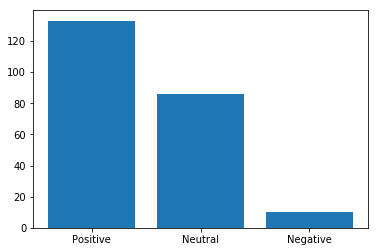

In [18]:
plt.bar(data['TextBlob_Analysis'].value_counts().index,
        data['TextBlob_Analysis'].value_counts())


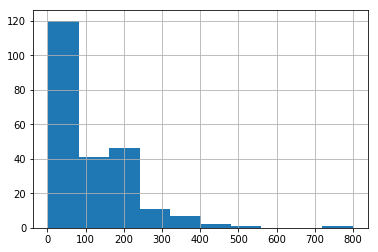

In [19]:
# Number of characters present in each text
data['Text2'].str.len().hist()

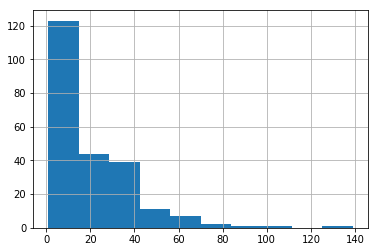

In [20]:
#Number of words in each text
data['Text2'].str.split().\
    map(lambda x: len(x)).\
    hist()

In [21]:
# Code Snippet for Word Number Histogram

def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

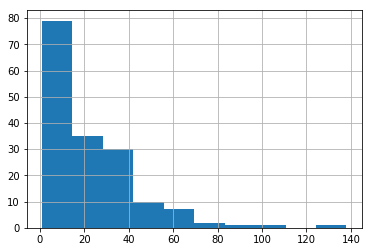

In [17]:
plot_word_number_histogram(data['body_text_clean'])

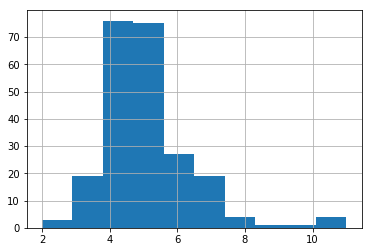

In [22]:
#Average word length
data['Text2'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

In [23]:
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sumat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
stop = set(stopwords.words('english'))

In [21]:
corpus=[]
new= data['Text2'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [25]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

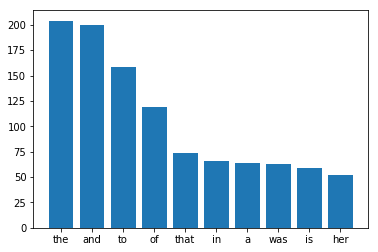

In [26]:
plot_top_stopwords_barchart(data['Text2'])

In [27]:

from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

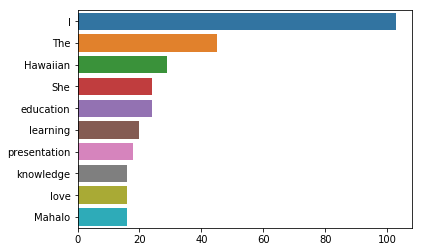

In [28]:
plot_top_non_stopwords_barchart(data['Text2'])

In [29]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

In [31]:
#build a representation of vocabulary
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

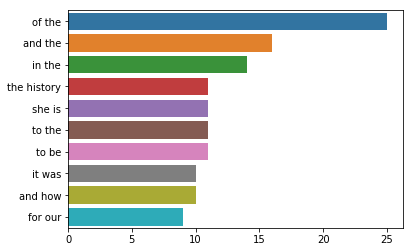

In [32]:
plot_top_ngrams_barchart(data['Text2'],2)

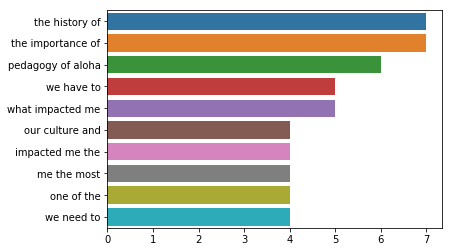

In [33]:
plot_top_ngrams_barchart(data['Text2'],3)

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for data in text:
            words=[w for w in word_tokenize(data) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sumat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


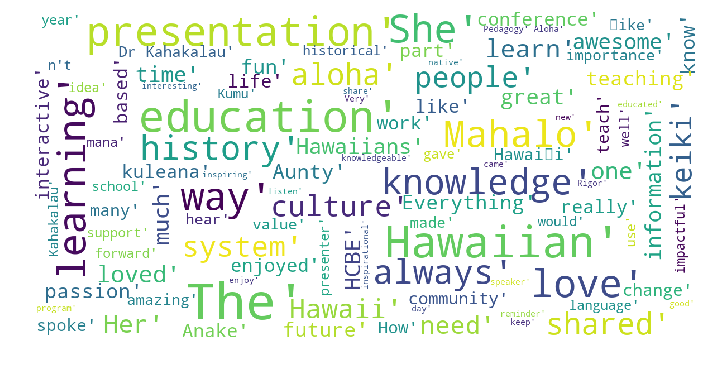

In [35]:
plot_wordcloud(data['Text2'])

In [36]:
def clean_tweet(tweet): 
    ''' 
    Utility function to clean tweet text by removing links, special characters 
    using simple regex statements. 
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 

In [37]:
def get_sentiment(text): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(text)
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [38]:
from pprint import pprint

stweet = get_sentiment(data['body_text_clean'][3])
ctweet = clean_tweet (data['body_text_clean'][3])
#pprint("Sentiment {} - Text {} ".format(stweet))
pprint(ctweet)
    
    

'I enjoyed the keynote because it was informational and felt really welcoming'


C:\Users\sumat\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
C:\Users\sumat\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


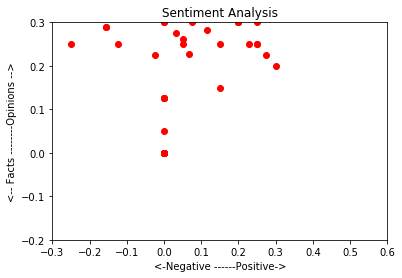

In [39]:


#plt.rcParams['figure.figsize'] = [10, 8]

#for index, comedian in enumerate(data.index):
x = data.polarity
y = data.subjectivity
plt.scatter(x, y, color='red')
#plt.text(x+.001, y+.001, data['text'])
plt.xlim(-.3, .6) 
plt.ylim(ymin=-.2, ymax=.3)
plt.title('Sentiment Analysis')
plt.xlabel('<-Negative ------Positive->')
plt.ylabel('<-- Facts --------Opinions -->')

plt.show()

In [40]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=6):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [41]:
data

,Record ID,Description,Text2,body_text_clean,body_text_tokenized,polarity,subjectivity,TextBlob_Analysis
0,1,Impact,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...,to meet someon with the knowledg and passion for hawaii is inspir and gave me a deeper love for ...,0.333333,0.533333,Positive
1,2,Impact,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...,To meet someone with the knowledge and passion for Hawaii is inspirational and gave me a deeper ...,to meet someon with the knowledg and passion for hawaii is inspir and gave me a deeper love for ...,0.333333,0.533333,Positive
2,3,Impact,Anake Kū is my Kumu. I have looked up to her and have followed along in her mission and in her v...,Anake Kū is my Kumu I have looked up to her and have followed along in her mission and in her vi...,anak kū is my kumu i have look up to her and have follow along in her mission and in her vision ...,0.175000,0.375000,Positive
3,4,Impact,I enjoyed the keynote because it was informational and felt really welcoming.,I enjoyed the keynote because it was informational and felt really welcoming,i enjoy the keynot becaus it wa inform and felt realli welcom,0.350000,0.450000,Positive
4,5,Impact,That Ku is a force in and of herself and changes and adapts with the times and circumstances. I...,That Ku is a force in and of herself and changes and adapts with the times and circumstances I ...,that ku is a forc in and of herself and chang and adapt with the time and circumst i know she h...,0.616667,0.741667,Positive
...,...,...,...,...,...,...,...,...
224,237,Impact,Mahalo Anake Kū! She is always amazing so lucky to be able to learn from her.,Mahalo Anake Kū She is always amazing so lucky to be able to learn from her,mahalo anak kū she is alway amaz so lucki to be abl to learn from her,0.477778,0.786111,Positive
225,238,Impact,mahalo nui,mahalo nui,mahalo nui,0.000000,0.000000,Neutral
226,239,Impact,i wish there was more time for each presentation~ i am looking forward to the recordings!,i wish there was more time for each presentation i am looking forward to the recordings,i wish there wa more time for each present i am look forward to the record,0.500000,0.500000,Positive
227,240,Impact,I enjoy learning from Aunty KŪ,I enjoy learning from Aunty KŪ,i enjoy learn from aunti kū,0.400000,0.500000,Positive


In [42]:
list_pieces = []
for t in data.Text2:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

ZeroDivisionError: division by zero

In [ ]:
len(list_pieces)

In [ ]:
len(list_pieces[0])

In [ ]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

In [ ]:
plt.plot(polarity_transcript[0])
plt.plot(np.arange(0,6), np.zeros(6))
#plt.title(data['text'].index[1])
plt.ylim(ymin=-.2, ymax=.3)
plt.xlabel('<-Feedback comments->',fontsize=12)
plt.ylabel('<-Negative ------Positive->',fontsize=12)
plt.show()

In [ ]:
#plt.subplot(3, 4, index+1)
plt.plot(polarity_transcript)
plt.plot(np.arange(0,10), np.zeros(10))
plt.title(data['text'])
plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()